Front matter

In [1]:
import sympy
sympy.init_printing()
%matplotlib inline

Define variables

In [2]:
s = sympy.Symbol('s')
tau, K_c = sympy.symbols('tau K_c', positive=True) # we can use real=True or complex=True for other kinds of variables

Example controller and system

In [3]:
G_c = K_c*((tau*s + 1) / (tau*s))
GvGpGm = 5 / ((10*s + 1)**2)

Simplification

In [4]:
chareq = (GvGpGm*G_c + 1).simplify()
chareq *= sympy.denom(chareq.together())

Convert to polynomial in s

In [5]:
chareq = sympy.poly(chareq.together(), s)

Calculate the Routh Array

In [6]:
from control_utils import routh

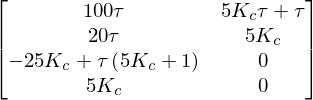

In [7]:
routh(chareq)